In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures, StandardScaler
from sklearn import tree,linear_model,neighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":10,"axes.titlesize":24,"axes.labelsize":24}) 

# Upload data

In [45]:
train = pd.read_csv('TrainClean.csv',index_col=0).reset_index(drop=True)
test = pd.read_csv('TestClean.csv',index_col=0).reset_index(drop=True)
train.describe()

,IsHoliday,HasPromotions,NearestCompetitor,Region_AreaKM2,Region_GDP,Region_PopulationK,Mean_Dew_PointC,Mean_Humidity,Mean_Sea_Level_PressurehPa,Mean_TemperatureC,...,December,Snow,Nothing,Fog,Hail,Thunderstorm,Rain,ZeroClouds,NumberOfSales,NumberOfCustomers
count,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.00000,...,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000
mean,0.000945,0.449507,8042.993882,12313.341916,14045.556837,3845.765475,6.285320,74.859115,1014.979698,10.33585,...,0.077973,0.076784,0.238873,0.254421,0.006415,0.061453,0.592698,0.000129,2.239679,312.547433
std,0.030723,0.497444,11640.203554,9114.075588,2760.416990,2816.324768,5.862926,12.928407,8.262854,7.04847,...,0.268129,0.266249,0.426396,0.435536,0.079839,0.240160,0.491333,0.011359,0.050325,158.106619
min,0.000000,0.000000,47.000000,344.000000,9893.000000,816.000000,-15.000000,30.000000,974.000000,-13.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1057.000000,7215.000000,11849.000000,1293.000000,2.000000,66.000000,1010.000000,4.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.211314,214.000000
50%,0.000000,0.000000,3307.000000,9337.000000,15017.000000,1892.000000,7.000000,76.000000,1015.000000,11.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.241269,278.000000
75%,0.000000,1.000000,9761.000000,15566.000000,15931.000000,5727.000000,11.000000,85.000000,1020.000000,16.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.270551,369.000000
max,1.000000,1.000000,85070.000000,32221.000000,23931.000000,8146.000000,20.000000,100.000000,1040.000000,30.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.415042,2206.000000


In [46]:
train.columns

Index(['IsHoliday', 'HasPromotions', 'NearestCompetitor', 'Region_AreaKM2',
       'Region_GDP', 'Region_PopulationK', 'Mean_Dew_PointC', 'Mean_Humidity',
       'Mean_Sea_Level_PressurehPa', 'Mean_TemperatureC', 'Mean_VisibilityKm',
       'Mean_Wind_SpeedKm_h', 'Precipitationmm', 'StandardMarket',
       'HyperMarket', 'SuperMarket', 'ShoppingCenter', 'General',
       'WithFishDepartment', 'WithNonFoodDepartment', 'Region0', 'Region1',
       'Region2', 'Region3', 'Region4', 'Region5', 'Region6', 'Region7',
       'Region8', 'Region9', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'Snow', 'Nothing', 'Fog', 'Hail', 'Thunderstorm', 'Rain',
       'ZeroClouds', 'NumberOfSales', 'NumberOfCustomers'],
      dtype='object')

# Normalization

In [47]:
all_data_index = train.columns.drop(['NumberOfSales','NumberOfCustomers'])
all_data = pd.concat((train.loc[:,all_data_index],test.loc[:,all_data_index]), ignore_index=True)
columns = all_data.columns

In [48]:
x = all_data.values
min_max_scaler = MinMaxScaler()
all_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(x))
all_data_normalized.columns = columns

In [49]:
all_data_normalized

,IsHoliday,HasPromotions,NearestCompetitor,Region_AreaKM2,Region_GDP,Region_PopulationK,Mean_Dew_PointC,Mean_Humidity,Mean_Sea_Level_PressurehPa,Mean_TemperatureC,...,October,November,December,Snow,Nothing,Fog,Hail,Thunderstorm,Rain,ZeroClouds
0,0.0,0.0,0.003281,0.291715,0.515529,0.266576,0.400000,0.742857,0.848485,0.325581,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.003281,0.291715,0.515529,0.266576,0.400000,0.614286,0.803030,0.372093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.003281,0.291715,0.515529,0.266576,0.400000,0.585714,0.757576,0.372093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.003281,0.291715,0.515529,0.266576,0.314286,0.371429,0.757576,0.372093,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.003281,0.291715,0.515529,0.266576,0.342857,0.500000,0.696970,0.395349,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.003281,0.291715,0.515529,0.266576,0.371429,0.428571,0.575758,0.441860,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.003281,0.291715,0.515529,0.266576,0.400000,0.414286,0.454545,0.465116,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.003281,0.291715,0.515529,0.266576,0.485714,0.357143,0.393939,0.558140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.003281,0.291715,0.515529,0.266576,0.628571,0.585714,0.393939,0.581395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.003281,0.291715,0.515529,0.266576,0.628571,0.714286,0.409091,0.534884,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
test_offset = train.shape[0]
train_normalized = all_data_normalized.iloc[0:test_offset,:]
train_normalized['NumberOfSales'] = train["NumberOfSales"]
train_normalized['NumberOfCustomers'] = train["NumberOfCustomers"]
test_normalized = all_data_normalized.iloc[test_offset:all_data_normalized.shape[0],:]
train=train_normalized
test=test_normalized
np.isnan(train).sum()

IsHoliday                     0
HasPromotions                 0
NearestCompetitor             0
Region_AreaKM2                0
Region_GDP                    0
Region_PopulationK            0
Mean_Dew_PointC               0
Mean_Humidity                 0
Mean_Sea_Level_PressurehPa    0
Mean_TemperatureC             0
Mean_VisibilityKm             0
Mean_Wind_SpeedKm_h           0
Precipitationmm               0
StandardMarket                0
HyperMarket                   0
SuperMarket                   0
ShoppingCenter                0
General                       0
WithFishDepartment            0
WithNonFoodDepartment         0
Region0                       0
Region1                       0
Region2                       0
Region3                       0
Region4                       0
Region5                       0
Region6                       0
Region7                       0
Region8                       0
Region9                       0
January                       0
February

# Lasso feature selection

In [51]:
# Regression on NumberOfCustomers
y=train['NumberOfCustomers'].values.reshape(-1,1)
x=train.drop(columns=['NumberOfCustomers','NumberOfSales'],axis=1)
x.columns

Index(['IsHoliday', 'HasPromotions', 'NearestCompetitor', 'Region_AreaKM2',
       'Region_GDP', 'Region_PopulationK', 'Mean_Dew_PointC', 'Mean_Humidity',
       'Mean_Sea_Level_PressurehPa', 'Mean_TemperatureC', 'Mean_VisibilityKm',
       'Mean_Wind_SpeedKm_h', 'Precipitationmm', 'StandardMarket',
       'HyperMarket', 'SuperMarket', 'ShoppingCenter', 'General',
       'WithFishDepartment', 'WithNonFoodDepartment', 'Region0', 'Region1',
       'Region2', 'Region3', 'Region4', 'Region5', 'Region6', 'Region7',
       'Region8', 'Region9', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'Snow', 'Nothing', 'Fog', 'Hail', 'Thunderstorm', 'Rain',
       'ZeroClouds'],
      dtype='object')

In [52]:
np.isnan(y).sum()

0

In [53]:
lasso = linear_model.LassoCV(cv=10)
lasso_fit=lasso.fit(x,y)
yp_lasso = lasso.predict(x)
r2_simple_train = r2_score(y,yp_lasso)
rmse_simple_train = mean_squared_error(y,yp_lasso,multioutput='raw_values')
print("Linear Regression with Lasso")
print("==================================================")
print("\t                  Train R2=%.3f"%(r2_simple_train))
print("\t                  Train RMSE=%.3f"%(rmse_simple_train))
print("\nLinear Regression with Lasso - Chosen Features")
selected=[]
threshold=1
for i,c in enumerate(np.append(lasso_fit.intercept_,lasso_fit.coef_)):
    #print("%d\t%3.3f" % (i,c) )
    if abs(c)>threshold and not i == 0:
        selected.append(x.columns[i-1])
x=x[selected]
x.columns

Linear Regression with Lasso
	                  Train R2=0.321
	                  Train RMSE=16981.830

Linear Regression with Lasso - Chosen Features


Index(['HasPromotions', 'NearestCompetitor', 'Region_AreaKM2',
       'Mean_Dew_PointC', 'Mean_Sea_Level_PressurehPa', 'Mean_VisibilityKm',
       'Precipitationmm', 'StandardMarket', 'HyperMarket', 'ShoppingCenter',
       'General', 'WithFishDepartment', 'Region0', 'Region1', 'Region3',
       'Region4', 'Region5', 'Region6', 'Region7', 'Region8', 'Region9',
       'January', 'February', 'April', 'May', 'June', 'September', 'October',
       'December', 'Snow', 'Nothing', 'Fog'],
      dtype='object')

In [54]:
train[x.columns].to_csv("FinalTrain.csv")
test[x.columns].to_csv("FinalTest.csv")

# RUNNA FINO A QUA E BASTA

# Trial of different model complexities

In [94]:
perf=[]
cross_tot=[]
n=8
for i in np.arange(n)+1:
    
    clf = tree.DecisionTreeRegressor(max_depth=i)
    
    #clf = linear_model.LinearRegression()
    #poly=PolynomialFeatures(x)
    #poly.fit_transform(x)
    
    #clf=neighbors.KNeighborsRegressor(i)
    
    clf = clf.fit(x, y)
    #clf = clf.fit(xp, y)
    yp = clf.predict(x).reshape(-1,1)
    #yp = clf.predict(xp).reshape(-1,1)
    
    cross=cross_val_score(clf,x,y).mean() # This is a 3 folds cross-val. As the dataset is big, it's enough!
    #cross=cross_val_score(clf,xp,y).mean()
    cross_tot.append(cross)
    perf.append((i,mean_squared_error(y,yp),r2_score(y,yp),cross))
print("Complexity , RMSE , R2 , crossval_score")
perf

Complexity , RMSE , R2 , crossval_score


[(1, 21459.044300149246, 0.14155738044153643, 0.033292279518822),
 (2, 19182.840643968262, 0.23261410235002167, 0.09313603533597337),
 (3, 17763.682700422076, 0.28938576680930606, 0.10920752989007772),
 (4, 16640.875544176764, 0.33430228326663547, 0.18338515197594585),
 (5, 16039.636935643426, 0.358354092791324, 0.16815469671502573),
 (6, 15645.598592056429, 0.37411711108533763, 0.18271755087020838),
 (7, 15349.440406149077, 0.38596455430592047, 0.1817557007911461),
 (8, 14933.073477676677, 0.4026208001189211, 0.16709951031050166)]

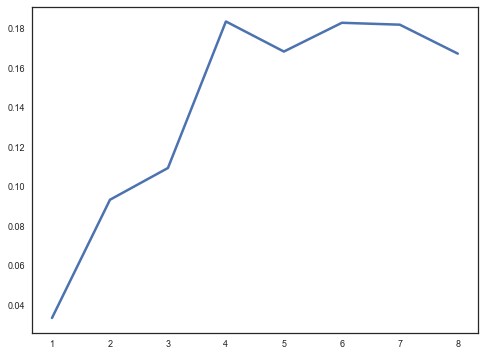

In [95]:
plt.plot(list(np.arange(n)+1),cross_tot,)

# Gradient boosting

Step 1: generate a first model

In [96]:
perf=[]
model_list=[] # lol
prediction = np.zeros((len(y),1))
clf = tree.DecisionTreeRegressor(max_depth=6) # it is the best one
#clf = linear_model.LinearRegression()
#clf=neighbors.KNeighborsRegressor(2)
clf = clf.fit(x, y)
model_list.append(clf)
yp = clf.predict(x).reshape(-1,1)
prediction += yp
y_residual = y-yp
perf.append((mean_squared_error(y,prediction),r2_score(y,prediction)))

Step 2: loop generating models trained in predicting the residuals of the previous model

In [97]:
no_boosting_runs = 100
for i in range(no_boosting_runs):
    clf = tree.DecisionTreeRegressor(max_depth=6) # it WAS the best one
    #clf = linear_model.LinearRegression()
    # suggested no_boosting_runs = 3 for KNN
    #clf=neighbors.KNeighborsRegressor(2)
    clf = clf.fit(x, y_residual)
    model_list.append(clf)
    yp = clf.predict(x).reshape(-1,1)
    # update the prediction
    prediction += yp
    y_residual = y-prediction
    perf.append((mean_squared_error(y,prediction),r2_score(y,prediction)))

In [98]:
print("RMSE , R2")
perf[-20:]

RMSE , R2


[(10265.004060253948, 0.5893611638985536),
 (10250.03880936558, 0.5899598303160916),
 (10243.761342970423, 0.5902109526224291),
 (10225.126335835848, 0.590956423115725),
 (10210.09188518921, 0.591557857784306),
 (10189.752347088524, 0.5923715159381149),
 (10178.30029892543, 0.5928296410105519),
 (10159.889264280047, 0.5935661517604576),
 (10150.826041524762, 0.5939287148166155),
 (10146.098063333113, 0.5941178517570722),
 (10137.579150259153, 0.594458640375275),
 (10119.631325220136, 0.595176620995771),
 (10108.513259652535, 0.5956213855060994),
 (10088.017197000532, 0.5964413052316717),
 (10075.952243991984, 0.5969239488070631),
 (10061.306268157596, 0.5975098430195642),
 (10048.925954563145, 0.5980051022065216),
 (10041.488749946104, 0.5983026184110807),
 (10027.947015737329, 0.5988443387982959),
 (10020.59883094739, 0.5991382938743861)]

Definition of a function to boosted model evaluation

In [99]:
def GradientBoosting_eval(models,x):
    prediction = np.zeros((len(x),1))
    for model in models:
        yp = model.predict(x).reshape(-1,1)
        prediction += yp
    return prediction.reshape(-1,1)

result=GradientBoosting_eval(model_list,x)

In [100]:
result

array([[466.0846229 ],
       [498.78884011],
       [498.48281163],
       ...,
       [297.61013953],
       [312.8130995 ],
       [272.79529979]])

In [101]:
model_list

[DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6,